<a href="https://colab.research.google.com/github/Astired/Aya/blob/master/final_of_before_fd_Graduation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing needed libraries**

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install sweetviz
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Reading our data**

In [242]:
data_df = pd.read_csv("kc_house.csv")

**Data Exploration**

In [243]:
data_df.shape

(21613, 21)

In [244]:
data_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [245]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [246]:
data_df['bathrooms'] = data_df.bathrooms.astype(int)

**Scall ID (1:21613)**

In [247]:
for houseid in range(data_df.shape[0]):
   data_df.id[houseid] = houseid+1

In [248]:
data_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1,20141013T000000,3,1,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2,20141209T000000,3,2,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,3,20150225T000000,2,1,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,20141209T000000,4,3,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,5,20150218T000000,3,2,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


**Filling the missing data**

In [249]:
data_df.isnull()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Making checkup for the nulls/NAN simpler** 

In [250]:
data_df.isnull().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

**Checking the NAN in the whole df**

In [251]:
data_df.isnull().any().any()

False

**Checking the NAN using integers**

In [252]:
data_df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [253]:
data_df.isnull().sum().sum()

0

In [254]:
data_df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [255]:
data_df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

# **Drop duplicated rows**

In [256]:
data_df.shape

(21613, 21)

In [257]:
data_df = data_df.drop_duplicates()

In [258]:
data_df.shape

(21613, 21)

## **Effeactive values for effective features**

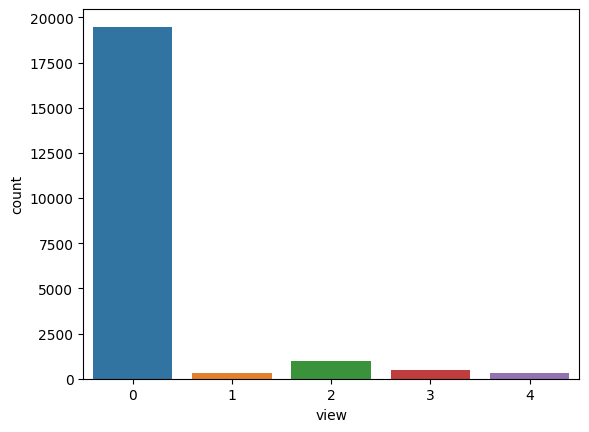

In [259]:
sns.countplot(data_df['view'])

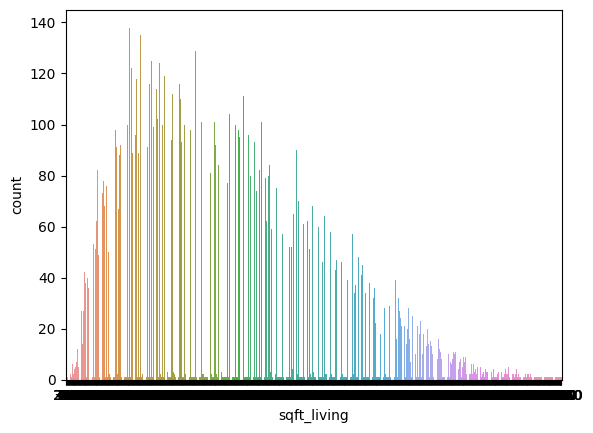

In [260]:
sns.countplot(data_df['sqft_living'])

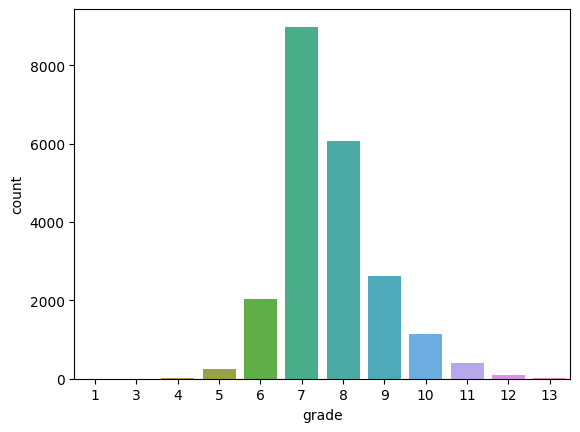

In [261]:
sns.countplot(data_df['grade'])

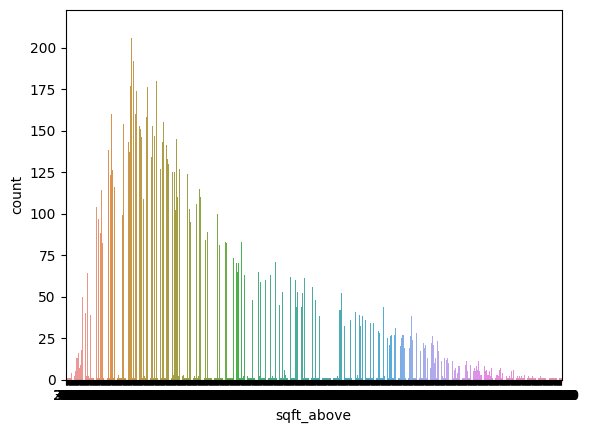

In [262]:
sns.countplot(data_df['sqft_above'])

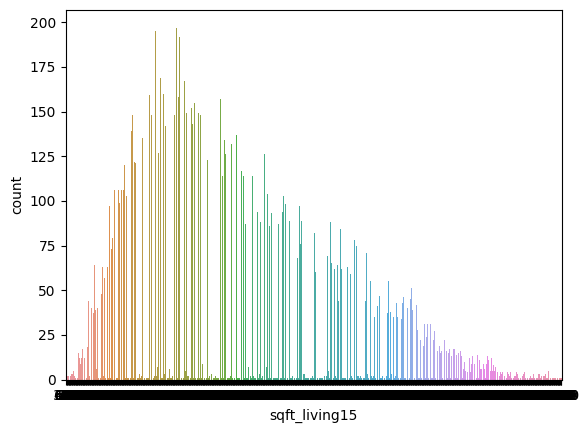

In [263]:
sns.countplot(data_df['sqft_living15'])

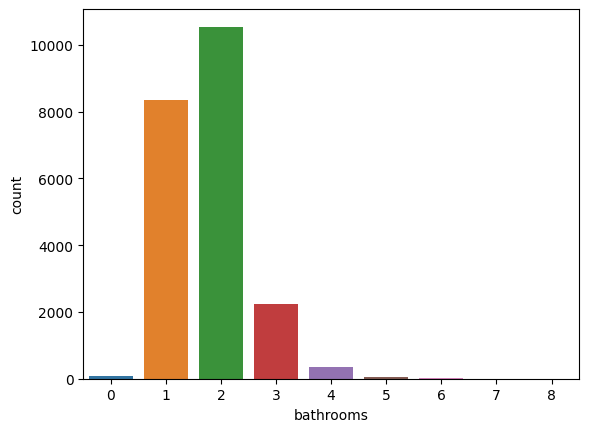

In [264]:
sns.countplot(data_df['bathrooms'])

Drop not affect features

In [265]:
data_df.drop('id',axis=1,inplace=True)
data_df.drop('date',axis=1, inplace=True)
data_df.drop("zipcode", axis=1, inplace=True)
data_df.drop("yr_renovated", axis=1, inplace=True) #many zero's
data_df.drop("sqft_basement", axis=1, inplace=True) #many zero's
data_df.drop('view',axis=1, inplace=True) #many zero's

In [266]:
data_df.shape

(21613, 15)

In [267]:
data_df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'yr_built', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [268]:
data_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,price
0,3,1,1180,5650,1.0,0,3,7,1180,1955,47.5112,-122.257,1340,5650,221900
1,3,2,2570,7242,2.0,0,3,7,2170,1951,47.7210,-122.319,1690,7639,538000
2,2,1,770,10000,1.0,0,3,6,770,1933,47.7379,-122.233,2720,8062,180000
3,4,3,1960,5000,1.0,0,5,7,1050,1965,47.5208,-122.393,1360,5000,604000
4,3,2,1680,8080,1.0,0,3,8,1680,1987,47.6168,-122.045,1800,7503,510000


In [269]:
data_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,3.370842,1.749734,2079.899736,1.510697e+04,1.494309,0.007542,3.409430,7.656873,1788.390691,1971.005136,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,0.930062,0.734873,918.440897,4.142051e+04,0.539989,0.086517,0.650743,1.175459,828.090978,29.373411,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


#Correlation check

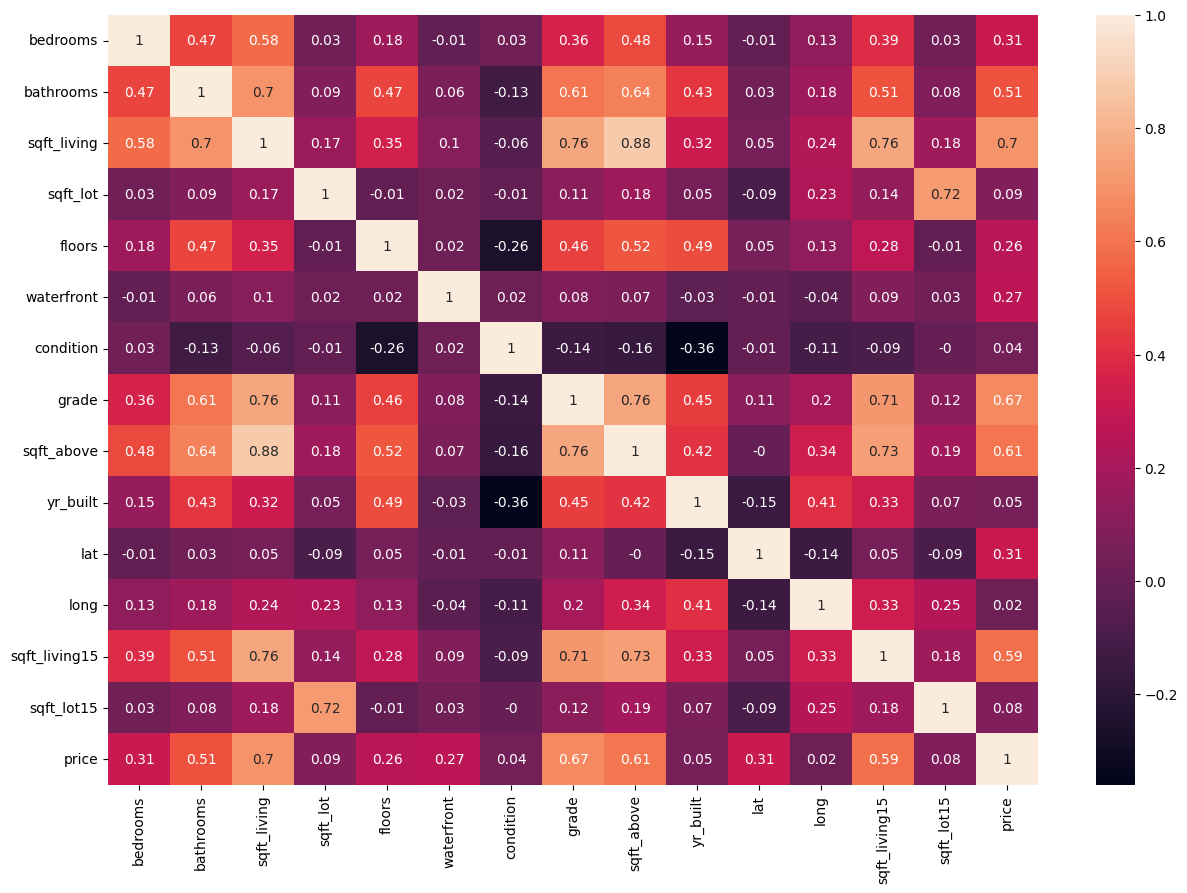

In [270]:
plt.figure(figsize = (15,10))
sns.heatmap(data_df.corr().round(2), annot=True) #sqft-living  , grade, sqft above, sqft living 15, bathroom

**Scatter between effective features**

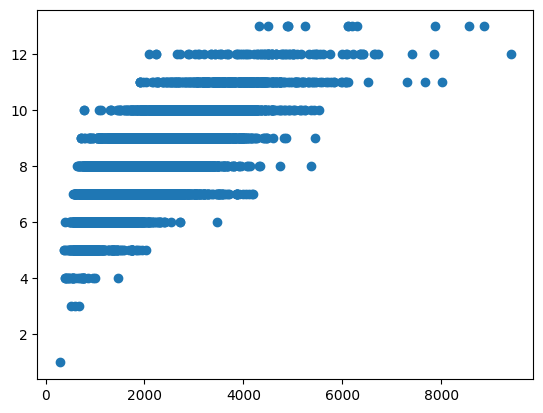

In [271]:
plt.scatter(data_df["sqft_above"],data_df["grade"])

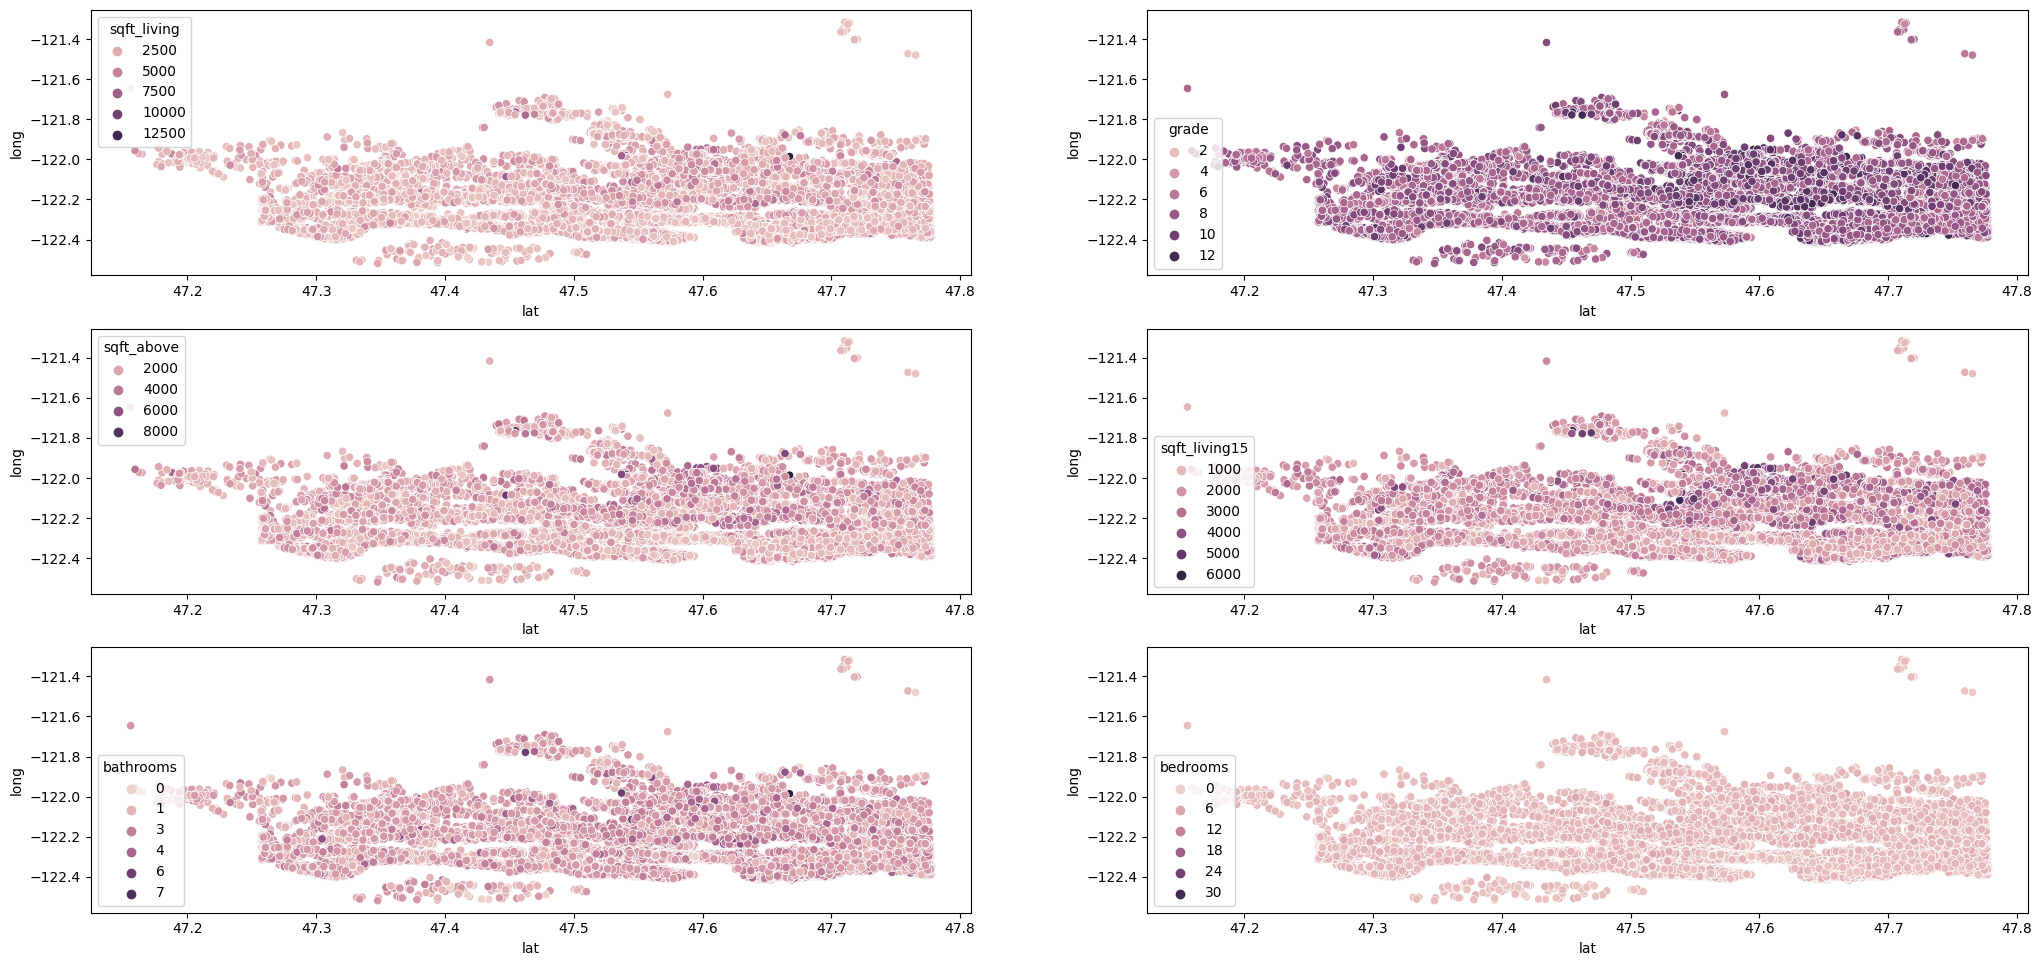

In [272]:
plt.figure(figsize = (25,20))
for i,col in enumerate(['sqft_living', 'grade',
       'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms']):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x = 'lat', y = 'long', data = data_df, hue = col)
plt.show()

**Generating EDA profile**

In [273]:
#import warnings
#warnings.filterwarnings("ignore")

In [274]:
#!pip install pandas-profiling==2.7.1

In [275]:
#from pandas_profiling import ProfileReport

In [276]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
#import pandas

In [277]:
#profile = ProfileReport(data_df, title="House Prices EDA Report")

In [278]:
#profile

In [279]:
#profile.to_file("House Prices EDA Report.html")


# sweetviz Reporting

In [280]:
report= sv.analyze(data_df)

                                             |          | [  0%]   00:00 -> (? left)

In [281]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Splitting our data**

In [282]:
X = data_df.drop(['price'], axis=1)

In [283]:
y = pd.DataFrame(data_df['price'],columns=['price'])

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle =True)

Data Scalling

In [285]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = pd.DataFrame(scaler.fit_transform(X),columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','sqft_above','yr_built','lat','long','sqft_living15','sqft_lot15'])

In [286]:
print(X)

       bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0     -0.398737  -1.020246    -0.979835 -0.228321 -0.915427   -0.087173   
1     -0.398737   0.340565     0.533634 -0.189885  0.936506   -0.087173   
2     -1.473959  -1.020246    -1.426254 -0.123298 -0.915427   -0.087173   
3      0.676485   1.701375    -0.130550 -0.244014 -0.915427   -0.087173   
4     -0.398737   0.340565    -0.435422 -0.169653 -0.915427   -0.087173   
...         ...        ...          ...       ...       ...         ...   
21608 -0.398737   0.340565    -0.598746 -0.337424  2.788439   -0.087173   
21609  0.676485   0.340565     0.250539 -0.224386  0.936506   -0.087173   
21610 -1.473959  -2.381057    -1.154047 -0.332137  0.936506   -0.087173   
21611 -0.398737   0.340565    -0.522528 -0.307076  0.936506   -0.087173   
21612 -1.473959  -2.381057    -1.154047 -0.338752  0.936506   -0.087173   

       condition     grade  sqft_above  yr_built       lat      long  \
0      -0.629187 -0.558836 

In [287]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
3791,4,2,2740,6200,1.5,0,4,8,1820,1947,47.7084,-122.277,2430,6000
1402,2,1,910,4662,1.0,0,5,6,910,1942,47.5232,-122.354,890,6050
15407,4,3,1990,6180,2.0,0,3,7,1990,1990,47.3083,-122.360,1910,6180
19137,4,1,1790,7175,1.5,0,3,6,1410,1900,47.4963,-122.318,1790,8417
793,4,1,1330,7980,1.5,0,3,6,1330,1952,47.4920,-122.333,1570,8588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18528,4,2,1700,6025,1.0,0,3,6,1700,1978,47.3029,-122.221,1320,5956
20355,3,3,3420,23786,1.5,0,3,9,3420,2014,47.4739,-122.110,1590,23774
16955,3,1,1330,7600,1.0,0,4,7,1330,1968,47.3103,-122.366,1500,7776
3491,4,1,1400,6739,1.0,0,3,7,1000,1954,47.5402,-122.298,1500,6380


In [288]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
19175,4,1,1890,6000,1.0,0,4,6,1110,1947,47.7274,-122.305,1560,6356
15315,5,2,2260,11970,1.0,0,4,7,1250,1962,47.3896,-122.218,1950,11970
9952,3,1,1550,7270,1.5,0,5,7,1550,1953,47.7200,-122.317,1050,7210
13235,4,3,3640,13530,1.0,0,3,9,2570,1924,47.6293,-122.238,2760,15000
19703,4,2,2475,4276,2.0,0,3,7,2475,2014,47.3450,-122.210,2475,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,3,1,1080,3200,1.0,0,4,7,880,1926,47.6503,-122.338,1780,5200
19431,5,3,2860,20790,1.0,0,4,7,1800,1965,47.7757,-122.295,1920,9612
3619,2,1,760,5280,1.0,0,3,6,760,1946,47.4830,-122.330,1710,6594
12257,3,2,1820,7326,2.0,0,3,8,1820,1983,47.7133,-122.217,2430,7696


In [289]:
y_train

,price
3791,775000
1402,280000
15407,273000
19137,179000
793,249950
...,...
18528,206000
20355,657044
16955,218000
3491,325088


In [290]:
y_test

,price
19175,430000
15315,275000
9952,453500
13235,1651000
19703,319900
...,...
1846,805000
19431,565000
3619,122000
12257,489950


XGBRegressor Model

In [291]:
Model = XGBRegressor(learning_rate=0.3, max_depth=4, n_estimators=100)
#fit
Model.fit(X_train, y_train)
#predict
y_pred = Model.predict(X_test)
Model.score(X_test,y_test)

[15:01:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8754352398419405

In [292]:
Model.score(X_train, y_train)

0.9459384774891952

In [293]:
accuracy = Model.score(X_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 88%'

In [296]:
y_pred.shape

(6484,)

In [297]:
y_train.shape

(15129, 1)

# **Best fit line**

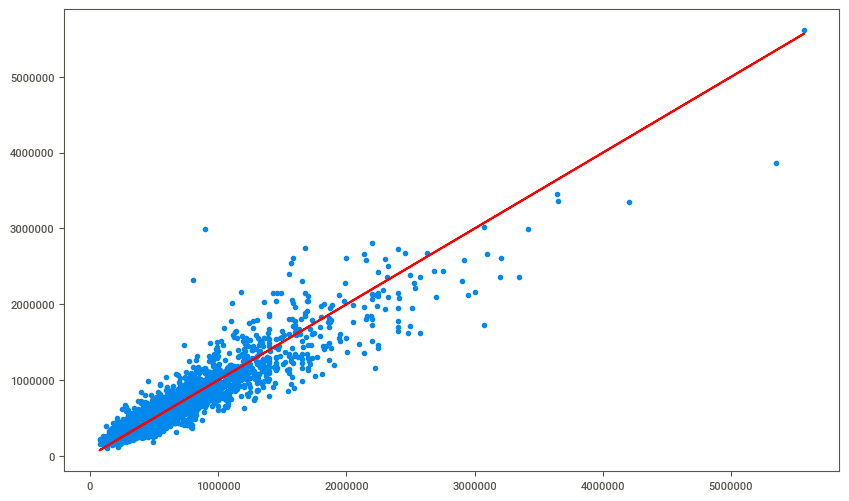

In [294]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='red')

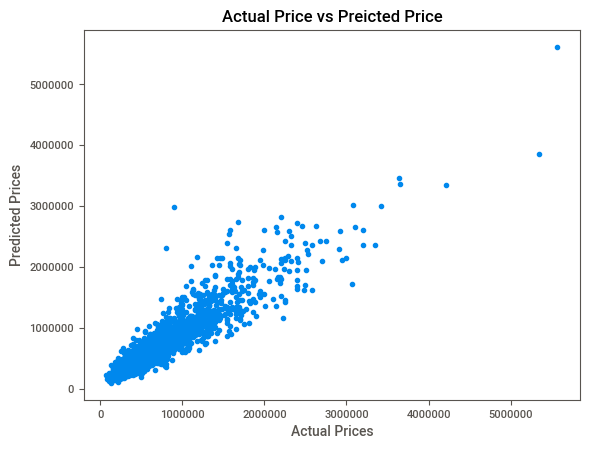

In [300]:
plt.scatter(y_test, y_pred)#ytest wla X
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# **Compare actual & Predict values**

In [301]:
#com_df = pd.DataFrame(y_test,y_pred,Error)

NameError: ignored

# **Merge data to create submission file**

In [302]:
y_test['price'] = y_pred

In [303]:
y_test.head(10)

,price
19175,4.729957e+05
15315,2.797735e+05
9952,4.674437e+05
13235,1.516122e+06
19703,3.522212e+05
8302,3.169232e+05
1610,6.224495e+05
11518,3.283377e+05
9523,2.599254e+05
4683,6.118379e+05


In [304]:
final_df = pd.merge(X_test,y_test[['price']],how = 'left',left_index = True, right_index = True)


In [305]:
final_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,price
19175,4,1,1890,6000,1.0,0,4,6,1110,1947,47.7274,-122.305,1560,6356,4.729957e+05
15315,5,2,2260,11970,1.0,0,4,7,1250,1962,47.3896,-122.218,1950,11970,2.797735e+05
9952,3,1,1550,7270,1.5,0,5,7,1550,1953,47.7200,-122.317,1050,7210,4.674437e+05
13235,4,3,3640,13530,1.0,0,3,9,2570,1924,47.6293,-122.238,2760,15000,1.516122e+06
19703,4,2,2475,4276,2.0,0,3,7,2475,2014,47.3450,-122.210,2475,4000,3.522212e+05


In [306]:
final_df.to_csv('Submission.csv')

In [307]:
pip freeze > requirements.txt